In [1]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications

def fetch_satellite_data():
    """Manually downloads and extracts the EuroSAT dataset."""
    print("Fetching satellite imagery...")
    !wget --no-check-certificate https://madm.dfki.de/files/sentinel/EuroSAT.zip -O eurosat.zip

    with zipfile.ZipFile('eurosat.zip', 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Data extraction complete.")

fetch_satellite_data()

ModuleNotFoundError: No module named 'tensorflow'

In [9]:
def prepare_datasets(path):
    """Organizes raw images into training and validation sets."""
    train_set = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(224, 224),
        batch_size=32
    )

    val_set = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(224, 224),
        batch_size=32
    )
    return train_set, val_set

train_ds, val_ds = prepare_datasets('dataset/2750')
class_names = train_ds.class_names
print(f"Target Classes: {class_names}")

Found 27000 files belonging to 10 classes.
Using 21600 files for training.
Found 27000 files belonging to 10 classes.
Using 5400 files for validation.
Target Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [11]:
print("Starting training cycle...")
history = final_model.fit(train_ds, epochs=3, validation_data=val_ds)

Starting training cycle...
Epoch 1/3
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.8037 - loss: 0.5571 - val_accuracy: 0.7989 - val_loss: 0.5615
Epoch 2/3
675/675 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.8143 - loss: 0.5332 - val_accuracy: 0.8094 - val_loss: 0.5470
Epoch 3/3
675/675 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.8169 - loss: 0.5134 - val_accuracy: 0.8057 - val_loss: 0.5458


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


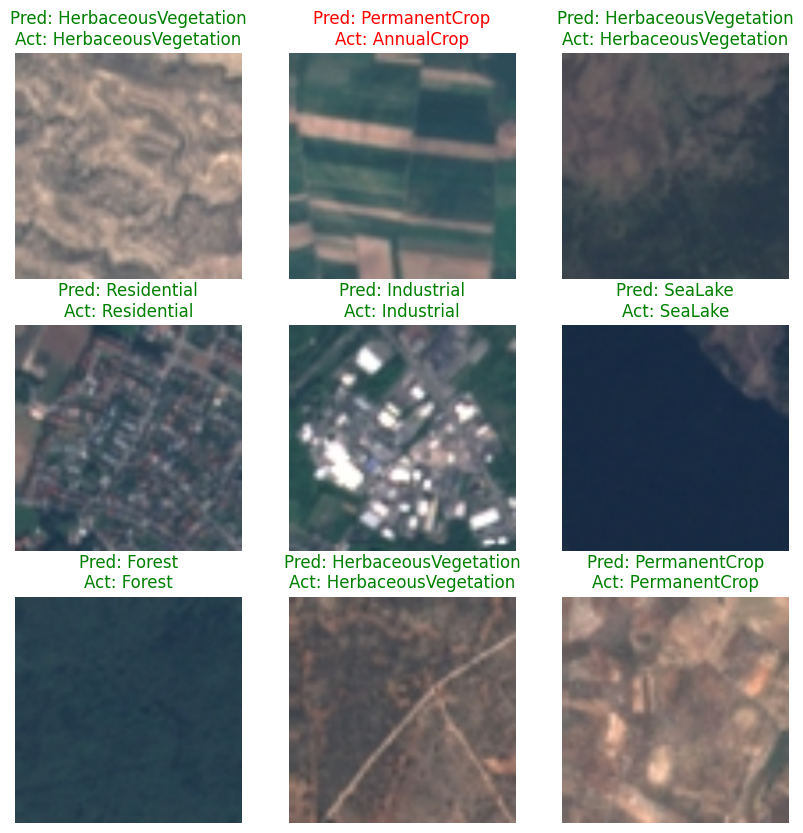

In [12]:
def verify_predictions(dataset, model, classes):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        preds = model.predict(images)
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_label = classes[np.argmax(preds[i])]
            actual_label = classes[labels[i]]
            color = 'green' if predicted_label == actual_label else 'red'
            plt.title(f"Pred: {predicted_label}\nAct: {actual_label}", color=color)
            plt.axis('off')

verify_predictions(dataset=val_ds, model=final_model, classes=class_names)